In [12]:
#Create mask to explore regions with yellow (non-RGB) biomarkers (in HSV color space)
#Geomx allow output with customzied color (RGB is still preferred)

import cv2
import numpy as np
import matplotlib.pyplot as plt


In [13]:
image_path = "example_yellowPCK.tiff"
image = cv2.imread(image_path)

In [14]:
# Convert the image to RGB --> HSV color space
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


In [15]:
# Define the HSV Range (e.g. Yellow 20-50, Green 50-80)
# Key: <<--- tune the Lower and Upper boundary for the target color mask
lower_mycolor = np.array([20, 20, 50])  # Lower boundary for yellow
upper_mycolor = np.array([50, 255, 255])  # Upper boundary for yellow

In [16]:
# Create a Mask
yellow_mask = cv2.inRange(hsv_image, lower_mycolor, upper_mycolor)

# Apply Morphological Operations to Clean the Mask (optional)
kernel = np.ones((3, 3), np.uint8) #smaller kernel for light regions (adjust)
mask_cleaned = cv2.morphologyEx(yellow_mask, cv2.MORPH_OPEN, kernel)
mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_CLOSE, kernel)

In [17]:
# Extract Yellow Regions from the Original Image
segmented_image = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_cleaned)

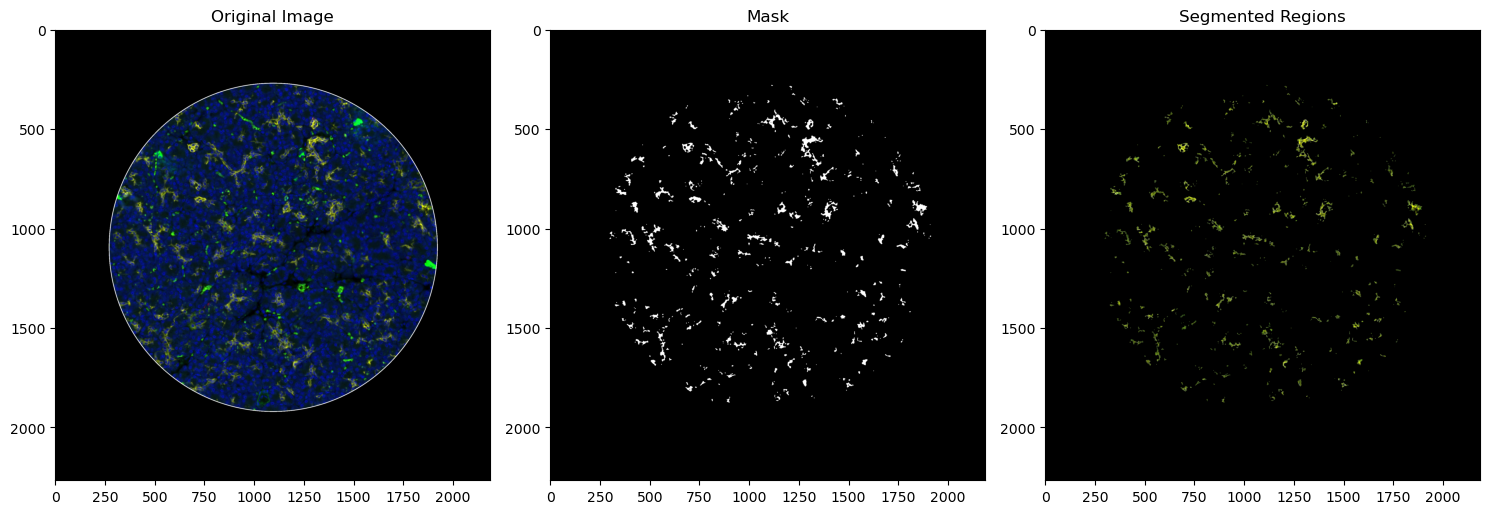

In [18]:
# Plots
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_rgb)

plt.subplot(1, 3, 2)
plt.title("Mask")
plt.imshow(mask_cleaned, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Segmented Regions")
plt.imshow(segmented_image)

plt.tight_layout()
plt.show()

In [19]:
#Save the cleaned mask
#np.save("Pancreas 00 - 019_mask_cleaned.npy", mask_cleaned)